# Measuring positions of the vehicle
The code snippets below take CSV files from positional video recordings of the remote control car. In this notebook we will analyze the vehicles positions on different tracks.

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

def read_x_y(fname):
    f = open(fname, 'r')
    reader = csv.reader(f)
    x = []
    y = []
    for row in reader:
        x.append( round(float(row[1]),1) )
        y.append( round(-float(row[2]) + 300,1 ))
    return x, y

Calculate average x, y positions of the tracks=
* does the mean of the robot path, is it or not different thatn the human path
* Student tea test, demonstrate normality - is it normal
* null hypothesis, assume that the mean robot error

In [13]:
import os
cwd = os.getcwd()
directory = cwd+'/csvs/circuitcsv/'
rnn,rnncat, linear, cat, human = [],[],[],[],[]
for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".py"): 
        #print(os.path.join(directory, filename))
        fdir = os.path.join(directory, filename)
        if 'rnncat' in  filename:
            #rnncat.append(read_x_y(str(fdir)))
            continue
        if 'cat' in filename:
            cat.append(read_x_y(str(fdir)))
            continue
        if 'linear' in filename:
            #linear.append(read_x_y(str(fdir)))
            continue
        if 'rnn' in filename:
            rnn.append(read_x_y(str(fdir)))
            continue
        if 'human' in filename:
            #human.append(read_x_y(str(fdir)))
            continue
        continue
    else:
        continue


rnn  size = 5
cat  size = 7


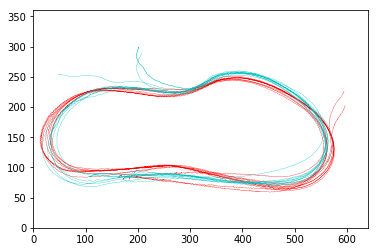

In [15]:
datasets = {'rnn':[rnn,'r'],'rnncat':[rnncat,'g'], 'linear':[linear,'b'], 'cat':[cat,'c'], 'human':[human,'tab:pink']}
for data in datasets:
    pos = datasets[data][0]
    #print(len(pos[1][0]))
    if(len(pos) != 0) :
        print(data + "  size = "+str(len(pos)))
        for i in range(len(pos)):
        #for i in range(2):
            plt.plot(pos[i][0],pos[i][1],c=datasets[data][1],linewidth=0.3)
        
plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.show()